# SENTIMENTAL ANALYSIS

In [4]:
# import the required libraries
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk
import spacy

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [5]:
# download for nltk
nltk.download("punk_tab")
nltk.download("stopwords")
nltk.download("wordnet")

[nltk_data] Error loading punk_tab: Package 'punk_tab' not found in
[nltk_data]     index
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [7]:
# Read the dataset
data = pd.read_csv("Tweets.csv")
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [8]:
data.shape

(14640, 15)

In [9]:
text_data = data[["text" , "airline_sentiment"]]

In [10]:
text_data.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


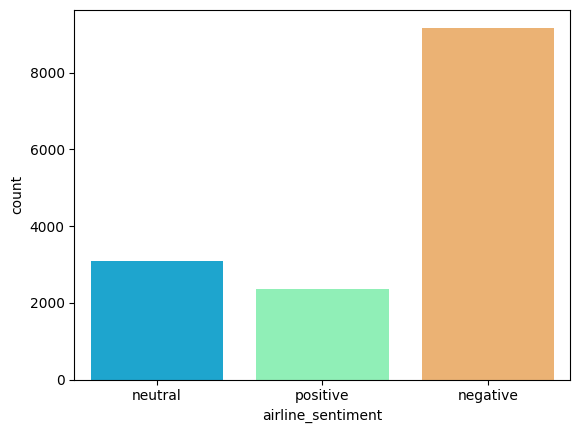

In [11]:
# Lets visualize the sentiments
sns.countplot(data = text_data  , x = "airline_sentiment" , palette="rainbow")
plt.show()

In [12]:
# lets see few Tweets in text
for i in text_data["text"][:5]:
    print(i)

@VirginAmerica What @dhepburn said.
@VirginAmerica plus you've added commercials to the experience... tacky.
@VirginAmerica I didn't today... Must mean I need to take another trip!
@VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse
@VirginAmerica and it's a really big bad thing about it


In [13]:
# lets do some preprocessing on the text data

# converting every text to lower case
text_data["text"] = text_data["text"].str.lower()

In [14]:
text_data["text"]

,text
0,@virginamerica what @dhepburn said.
1,@virginamerica plus you've added commercials t...
2,@virginamerica i didn't today... must mean i n...
3,@virginamerica it's really aggressive to blast...
4,@virginamerica and it's a really big bad thing...
...,...
14635,@americanair thank you we got on a different f...
14636,@americanair leaving over 20 minutes late flig...
14637,@americanair please bring american airlines to...
14638,"@americanair you have my money, you change my ..."


### Noise Removal

In [15]:
# first lets remove the @mentions from the text

clean_text = []
for i in text_data["text"]:
    clean_text.append(re.sub(r"@\w+" , "" , i))

text_data["text"] = clean_text

In [16]:
clean_text

[' what  said.',
 " plus you've added commercials to the experience... tacky.",
 " i didn't today... must mean i need to take another trip!",
 ' it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse',
 " and it's a really big bad thing about it",
 " seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying va",
 ' yes, nearly every time i fly vx this “ear worm” won’t go away :)',
 ' really missed a prime opportunity for men without hats parody, there. https://t.co/mwpg7grezp',
 " well, i didn't…but now i do! :-d",
 " it was amazing, and arrived an hour early. you're too good to me.",
 ' did you know that suicide is the second leading cause of death among teens 10-24',
 ' i &lt;3 pretty graphics. so much better than minimal iconography. :d',
 " this is such a great deal! already thinking about my 2nd trip to  &amp; i haven't even gone on my 1st trip yet! ;p",
 "  i'm 

In [17]:
# Lets remove HTTP links
clean_text_http = []
for i in text_data["text"]:
    clean_text_http.append(re.sub(r"http\S+" , "" , i))

text_data["text"] = clean_text_http

In [18]:
clean_text

[' what  said.',
 " plus you've added commercials to the experience... tacky.",
 " i didn't today... must mean i need to take another trip!",
 ' it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse',
 " and it's a really big bad thing about it",
 " seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying va",
 ' yes, nearly every time i fly vx this “ear worm” won’t go away :)',
 ' really missed a prime opportunity for men without hats parody, there. https://t.co/mwpg7grezp',
 " well, i didn't…but now i do! :-d",
 " it was amazing, and arrived an hour early. you're too good to me.",
 ' did you know that suicide is the second leading cause of death among teens 10-24',
 ' i &lt;3 pretty graphics. so much better than minimal iconography. :d',
 " this is such a great deal! already thinking about my 2nd trip to  &amp; i haven't even gone on my 1st trip yet! ;p",
 "  i'm 

In [19]:
# lets remove all emojis and hashtags
clean_text_emojis_hashtags = []
for i in text_data["text"]:
    clean_text_emojis_hashtags.append(re.sub(r"[^a-z\s]+" , "" , i))

text_data["text"] = clean_text_emojis_hashtags

In [20]:
data["text"].head()

,text
0,@VirginAmerica What @dhepburn said.
1,@VirginAmerica plus you've added commercials t...
2,@VirginAmerica I didn't today... Must mean I n...
3,@VirginAmerica it's really aggressive to blast...
4,@VirginAmerica and it's a really big bad thing...


In [21]:
# before cleaning

for i in data["text"].head(5):
    print(i)

@VirginAmerica What @dhepburn said.
@VirginAmerica plus you've added commercials to the experience... tacky.
@VirginAmerica I didn't today... Must mean I need to take another trip!
@VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse
@VirginAmerica and it's a really big bad thing about it


In [22]:
# after cleaning

for i in text_data["text"].head(5):
    print(i)

 what  said
 plus youve added commercials to the experience tacky
 i didnt today must mean i need to take another trip
 its really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse
 and its a really big bad thing about it


## Tokenization

In [23]:
# lets seperate the tweets with negative sentiments

negative_tweets = text_data[text_data["airline_sentiment"]=="negative"]["text"]
negative_tweets

,text
3,its really aggressive to blast obnoxious ente...
4,and its a really big bad thing about it
5,seriously would pay a flight for seats that ...
15,sfopdx schedule is still mia
17,i flew from nyc to sfo last week and couldnt...
...,...
14631,thx for nothing on getting us out of the coun...
14633,my flight was cancelled flightled leaving tom...
14634,right on cue with the delays
14636,leaving over minutes late flight no warnings...


In [24]:
corpus_negative_tweets = ""

for i in negative_tweets:
    corpus_negative_tweets = corpus_negative_tweets+" "+i

In [25]:
stop_words = stopwords.words("english")

In [26]:
le = WordNetLemmatizer()

In [28]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [29]:
negative_tokens = [le.lemmatize(word) for word in word_tokenize(corpus_negative_tweets) if word not in stop_words]

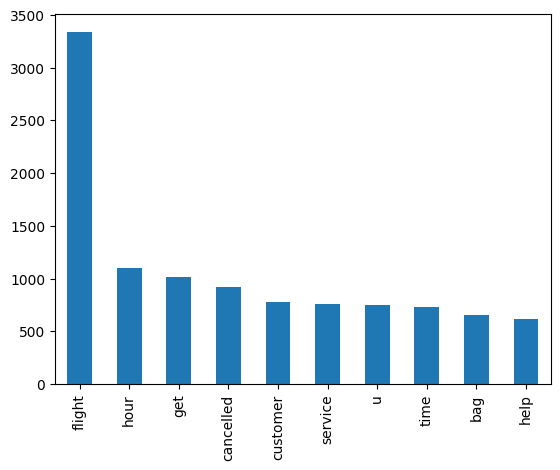

In [30]:
# lets create a series of negative tokens
pd.Series(negative_tokens).value_counts().head(10).plot(kind = "bar")
plt.show()

## WordCloud

In [31]:
# Lets create a Word Cloud of Negative Tokens

from wordcloud import WordCloud

(np.float64(-0.5), np.float64(799.5), np.float64(499.5), np.float64(-0.5))

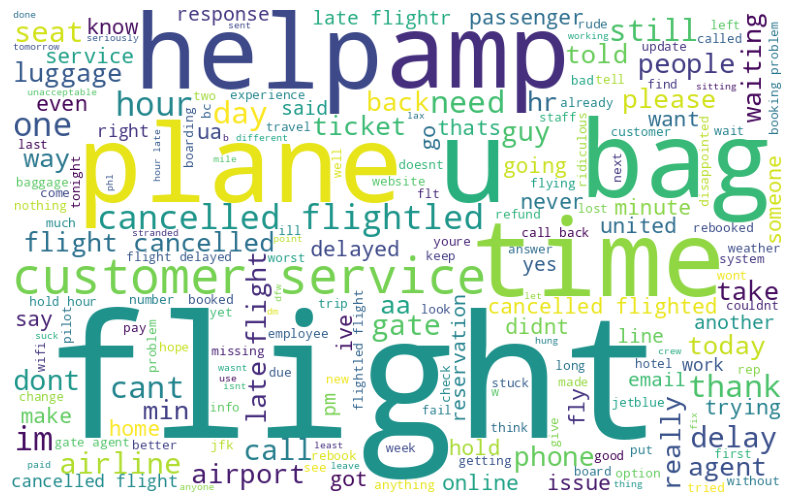

In [32]:
plt.figure(figsize=(10,15))
cloud = WordCloud(width=800 , height=500, background_color="white").generate(" ".join(negative_tokens))
plt.imshow(cloud) # imshow --> imageshow (it shows the cloud image)
plt.axis("off")

In [33]:
# lets seperate the tweets with positive sentiments

positive_tweets = text_data[text_data["airline_sentiment"]=="positive"]["text"]
positive_tweets

,text
1,plus youve added commercials to the experienc...
6,yes nearly every time i fly vx this ear worm ...
8,well i didntbut now i do d
9,it was amazing and arrived an hour early your...
11,i lt pretty graphics so much better than mini...
...,...
14623,love the new planes for the jfklax run maybe...
14625,flight was great fantastic cabin crew a land...
14628,thank you customer relations will review you...
14630,thanks he is


In [34]:
corpus_positive_tweets = ""

for i in positive_tweets:
    corpus_positive_tweets = corpus_positive_tweets+" "+i

In [35]:
positive_tokens = [le.lemmatize(word) for word in word_tokenize(corpus_positive_tweets) if word not in stop_words]

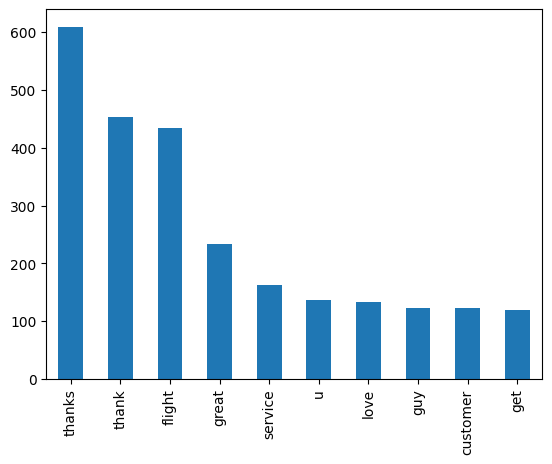

In [36]:
# lets create a series of positive tokens
pd.Series(positive_tokens).value_counts().head(10).plot(kind = "bar")
plt.show()

(np.float64(-0.5), np.float64(799.5), np.float64(499.5), np.float64(-0.5))

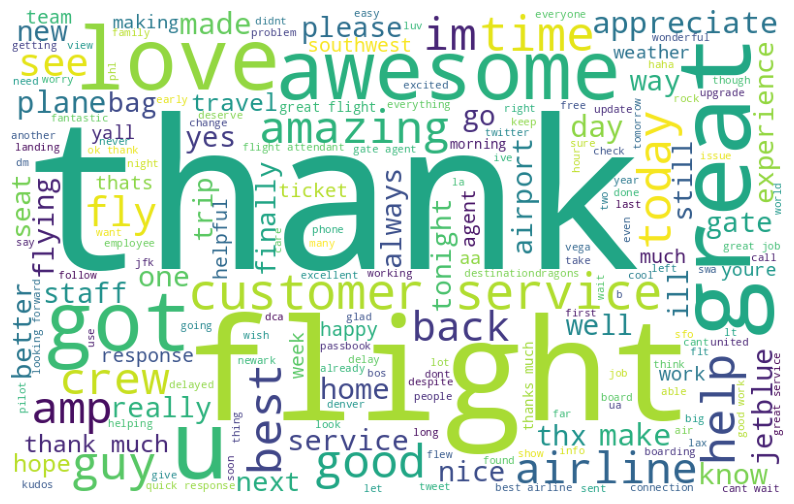

In [37]:
plt.figure(figsize=(10,15))
cloud = WordCloud(width=800 , height=500, background_color="white").generate(" ".join(positive_tokens))
plt.imshow(cloud) # imshow --> imageshow (it shows the cloud image)
plt.axis("off")

In [38]:
# lets seperate the tweets with neutral sentiments

neutral_tweets = text_data[text_data["airline_sentiment"]=="neutral"]["text"]
neutral_tweets

,text
0,what said
2,i didnt today must mean i need to take anothe...
7,really missed a prime opportunity for men wit...
10,did you know that suicide is the second leadi...
23,will you be making bosgtlas non stop permanen...
...,...
14607,i need someone to help me out
14611,guarantee no retribution if so id be glad to ...
14632,george that doesnt look good please follow t...
14637,please bring american airlines to blackberry


In [39]:
corpus_neutral_tweets = ""

for i in neutral_tweets:
    corpus_neutral_tweets = corpus_neutral_tweets+" "+i

In [40]:
neutral_tokens = [le.lemmatize(word) for word in word_tokenize(corpus_neutral_tweets) if word not in stop_words]

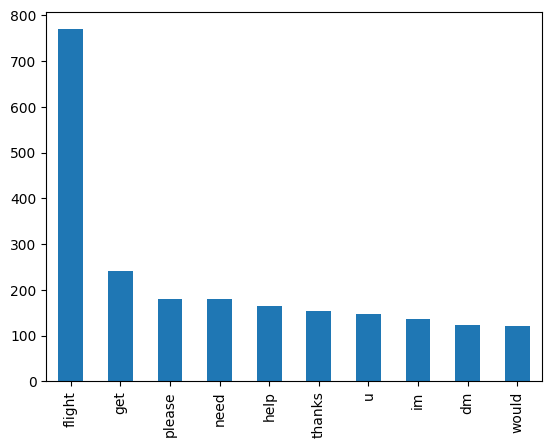

In [41]:
# lets create a series of neutral tokens
pd.Series(neutral_tokens).value_counts().head(10).plot(kind = "bar")
plt.show()

(np.float64(-0.5), np.float64(799.5), np.float64(499.5), np.float64(-0.5))

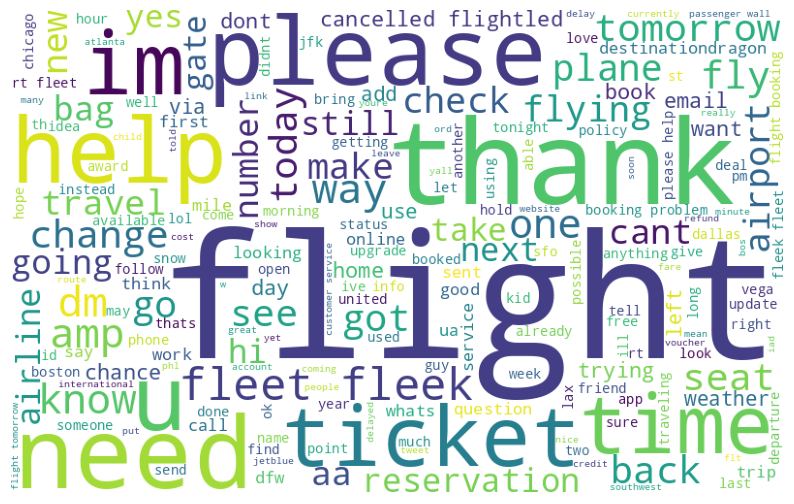

In [42]:
plt.figure(figsize=(10,15))
cloud = WordCloud(width=800 , height=500, background_color="white").generate(" ".join(neutral_tokens))
plt.imshow(cloud) # imshow --> imageshow (it shows the cloud image)
plt.axis("off")

## Vectorize using Bag Of Words (BOW)

In [43]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer

In [44]:
from nltk.stem import SnowballStemmer

In [45]:
sb = SnowballStemmer("english")

In [46]:
def text_preprocessing(text):
    clean = " ".join([le.lemmatize(sb.stem(t) , pos = "v") for t in word_tokenize(text) if t not in stop_words])
    return clean

In [47]:
text_data["text"] = text_data["text"].apply(text_preprocessing)

In [48]:
text_data.head()

,text,airline_sentiment
0,say,neutral
1,plus youv ad commerci experi tacki,positive
2,didnt today must mean need take anoth trip,neutral
3,realli aggress blast obnoxi entertain guest fa...,negative
4,realli big bad thing,negative


In [49]:
# lets split these tweets in train and test
from sklearn.model_selection import train_test_split

In [50]:
x = text_data[["text"]]
y = text_data["airline_sentiment"].map({"positive" : 2 , "negative" : 0 , "neutral" : 1})

x_train , x_test , y_train , y_test = train_test_split(x , y , stratify=y , train_size=0.8 , random_state=2)

In [51]:
vectorizer = CountVectorizer()

In [52]:
vectorizer.fit_transform(x_train["text"])

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 100038 stored elements and shape (11712, 8501)>

In [53]:
bow_matrix = vectorizer.fit_transform(x_train["text"]).toarray()

In [54]:
bow_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [55]:
# lets create a dataframe using this matrix

x_train_vectorized = pd.DataFrame(bow_matrix , columns=vectorizer.get_feature_names_out())
x_train_vectorized

,aa,aaaand,aaadvantag,aaalwaysl,aaba,aacom,aadavantag,aadelay,aadfw,aadv,...,zigzag,zip,zipper,zombi,zone,zoom,zrh,zuke,zurich,zurichnew
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11707,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11708,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11709,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11710,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
# vectors for test
bow_matrix_test = vectorizer.transform(x_test["text"]).toarray()

x_test_vectorized = pd.DataFrame(bow_matrix_test , columns=vectorizer.get_feature_names_out())
x_test_vectorized

,aa,aaaand,aaadvantag,aaalwaysl,aaba,aacom,aadavantag,aadelay,aadfw,aadv,...,zigzag,zip,zipper,zombi,zone,zoom,zrh,zuke,zurich,zurichnew
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2924,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2925,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2926,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Lets fit a Machine Learning Model

In [57]:
from xgboost import XGBClassifier

In [58]:
xgb = XGBClassifier(n_estimators = 100 , max_depth = 10)

In [59]:
xgb.fit(x_train_vectorized , y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [60]:
pred = xgb.predict(x_test_vectorized)

In [61]:
from sklearn.metrics import classification_report , confusion_matrix

In [62]:
print(classification_report(y_test , pred))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1835
           1       0.65      0.50      0.56       620
           2       0.72      0.63      0.67       473

    accuracy                           0.77      2928
   macro avg       0.73      0.68      0.70      2928
weighted avg       0.76      0.77      0.77      2928



<Axes: >

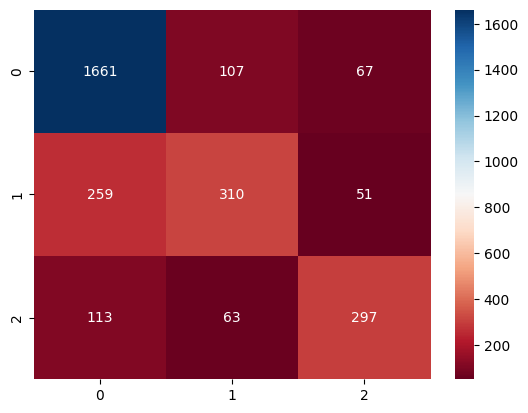

In [63]:
sns.heatmap(confusion_matrix(y_test , pred) , annot = True , cmap = "RdBu" , fmt = "g")

# Task
Create an `app.py` file based on the provided Jupyter Notebook "review_classification.ipynb" that allows users to input a review and get a sentiment classification (positive, negative, or neutral). Also, create a `requirements.txt` file listing all necessary dependencies for deploying this application on Streamlit.

## Create `requirements.txt`

### Subtask:
Generate a `requirements.txt` file listing all the necessary libraries from the notebook for the Streamlit application.


**Reasoning**:
The subtask is to create a `requirements.txt` file with the specified libraries. I will generate the content for this file.



In [64]:
%%writefile requirements.txt
numpy
pandas
matplotlib
seaborn
nltk
spacy
wordcloud
scikit-learn
xgboost
streamlit

Overwriting requirements.txt


## Create `app.py`

### Subtask:
Generate the `app.py` file containing the Streamlit application code. This will include:
  - Importing necessary libraries.
  - Loading the trained model and vectorizer.
  - Creating a text input field for user reviews.
  - Implementing the text preprocessing function.
  - Using the loaded model to predict the sentiment of the input review.
  - Displaying the predicted sentiment to the user.


**Reasoning**:
Generate the `app.py` file with the Streamlit application code, including necessary imports, data downloads, model loading, preprocessing function, and the Streamlit interface for user input and sentiment prediction.



In [65]:
%%writefile app.py
import streamlit as st
import pickle
import re
import nltk
import spacy
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import warnings
warnings.filterwarnings("ignore")


# Download NLTK data
try:
    nltk.data.find('tokenizers/punkt')
except nltk.downloader.DownloadError:
    nltk.download('punkt')
try:
    nltk.data.find('corpora/stopwords')
except nltk.downloader.DownloadError:
    nltk.download('stopwords')
try:
    nltk.data.find('corpora/wordnet')
except nltk.downloader.DownloadError:
    nltk.download('wordnet')


# Load the trained model and vectorizer
try:
    with open('xgb_model.pkl', 'rb') as f:
        xgb_model = pickle.load(f)
    with open('vectorizer.pkl', 'rb') as f:
        vectorizer = pickle.load(f)
except FileNotFoundError:
    st.error("Model or vectorizer file not found. Please ensure 'xgb_model.pkl' and 'vectorizer.pkl' are in the same directory.")
    st.stop()


# Initialize lemmatizer and stemmer
le = WordNetLemmatizer()
sb = SnowballStemmer("english")
stop_words = set(stopwords.words("english"))

# Text preprocessing function
def text_preprocessing(text):
    text = text.lower()
    text = re.sub(r"@\w+" , "" , text)
    text = re.sub(r"http\S+" , "" , text)
    text = re.sub(r"[^a-z\s]+" , "" , text)
    clean = " ".join([le.lemmatize(sb.stem(t) , pos = "v") for t in word_tokenize(text) if t not in stop_words])
    return clean

# Streamlit app
st.title("Airline Tweet Sentiment Analysis")

user_input = st.text_area("Enter your tweet about the airline:")

if st.button("Predict Sentiment"):
    if user_input:
        # Preprocess the input
        preprocessed_input = text_preprocessing(user_input)

        # Vectorize the input
        input_vectorized = vectorizer.transform([preprocessed_input])

        # Predict the sentiment
        prediction = xgb_model.predict(input_vectorized)

        # Map prediction to sentiment label
        sentiment_map = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}
        predicted_sentiment = sentiment_map[prediction[0]]

        st.write(f"Predicted Sentiment: {predicted_sentiment}")
    else:
        st.write("Please enter a tweet to predict the sentiment.")

Overwriting app.py


## Summary:

### Data Analysis Key Findings

*   The `requirements.txt` file was successfully created and populated with the necessary libraries for the Streamlit application.
*   The `app.py` file was successfully created, containing the Streamlit application code for sentiment classification.
*   The `app.py` includes necessary imports, NLTK data downloads with error handling, model and vectorizer loading with checks for missing files, a text preprocessing function, and the Streamlit user interface.
*   The Streamlit application in `app.py` allows users to input text, preprocesses the input, vectorizes it using the loaded vectorizer, predicts the sentiment using the loaded XGBoost model, and displays the predicted sentiment label.

### Insights or Next Steps

*   The created `app.py` and `requirements.txt` files are ready for deploying the sentiment classification application using Streamlit.
*   Ensure that the `xgb_model.pkl` and `vectorizer.pkl` files are in the same directory as `app.py` for the application to run correctly.


In [66]:
import pickle

# Save the trained XGBoost model
with open('xgb_model.pkl', 'wb') as f:
    pickle.dump(xgb, f)

# Save the fitted CountVectorizer
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

print("Model and vectorizer saved as 'xgb_model.pkl' and 'vectorizer.pkl'")

Model and vectorizer saved as 'xgb_model.pkl' and 'vectorizer.pkl'
